# Google Earth Images

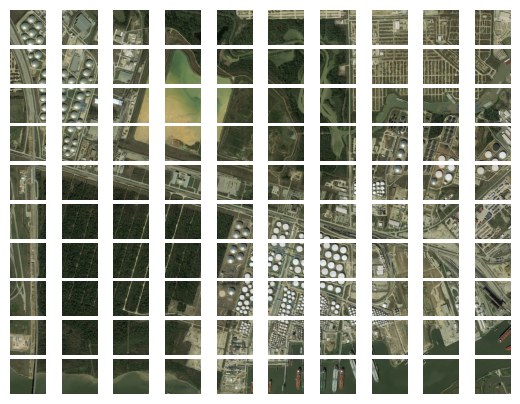

In [1]:
%matplotlib inline

# Visualisation of Image patches
import os
from PIL import Image
import matplotlib.pyplot as plt

HOME_DIR = os.path.expanduser('~')
image_patch_folder = 'apps/tmp/google_earth/Oil Tanks/image_patches/'
large_image_folder = 'apps/tmp/google_earth/Oil Tanks/large_images/'
image_patch_folder = os.path.join(HOME_DIR, image_patch_folder)
large_image_folder = os.path.join(HOME_DIR, large_image_folder)

ID = 10
num_chunks = 10

for x in range(num_chunks):
    for y in range(num_chunks):
        image_chunk = f"{ID}_{x}_{y}.jpg"
        chunk_path = os.path.join(image_patch_folder, image_chunk)
        load_image = Image.open(chunk_path)

        # Display the chunk image
        plt.subplot(num_chunks, num_chunks, x * num_chunks + y + 1)
        plt.imshow(load_image)
        plt.axis('off')  

large_image = os.path.join(large_image_folder, f'{ID}_large.jpg')
large_img = Image.open(large_image)

# Adjust the layout and display the plot
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.1,
                    hspace=0.1)
plt.show()

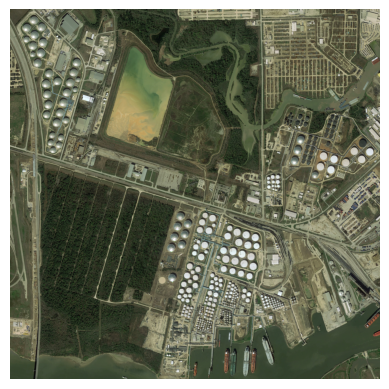

In [19]:
%matplotlib inline

plt.imshow(large_img)
plt.axis('off')
plt.show()

# Airbus SPOT images

In [9]:
import random

# Google earth images
image_patches = os.listdir(image_patch_folder)
random_patch = random.choice(image_patches)
random_patch = os.path.join(image_patch_folder, random_patch)
patch = Image.open(random_patch)
width, height = patch.size
print(f"Width and Height of Google Earth image patch is {width}, {height} respectively")

random_large_image = random.choice(os.listdir(large_image_folder))
random_large_image = os.path.join(large_image_folder, random_large_image)
google_earth_image = Image.open(random_large_image)
width, height = google_earth_image.size
print(f"Width and Height of a Google Earth large image is {width}, {height} respectively")


# Airbus images
airbus_image_folder = 'apps/tmp/airbus/images/'
airbus_image_folder = os.path.join(HOME_DIR, airbus_image_folder)
airbus_image = random.choice(os.listdir(airbus_image_folder))
airbus_image = os.path.join(airbus_image_folder, airbus_image)
airbus_image = Image.open(airbus_image)
AIRBUS_IMG_WIDTH, AIRBUS_IMG_HEIGHT = airbus_image.size
print(f"Width and Height of Airbus SPOT image is {AIRBUS_IMG_WIDTH}, {AIRBUS_IMG_HEIGHT} respectively")

Width and Height of Google Earth image patch is 512, 512 respectively
Width and Height of a Google Earth large image is 4800, 4800 respectively
Width and Height of Airbus SPOT image is 2560, 2560 respectively


# Planet Scenes

In [14]:
img = '20230520_102120_15_24b3_3B_Visual_clip.tif'
planet_image_folder = 'apps/tmp/planet_scenes'
planet_image_folder = os.path.join(HOME_DIR, planet_image_folder)
dest_path = 'apps/tmp/planet_scenes/patches'
dest_path = os.path.join(HOME_DIR, dest_path)
outfile = os.path.join(planet_image_folder, "stanlow.jpg")

img = Image.open(os.path.join(planet_image_folder, img))
rgb_im = img.convert('RGB')
rgb_im.save(outfile, "JPEG", quality = 100)

rgb_im = Image.open(outfile)
print(rgb_im.size)
print(rgb_im.mode)
print(rgb_im.info)

(2000, 1101)
RGB
{'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}


In [20]:
# Planet tiles

def cut_image(image, tile_size, overlap):
    width, height = image.size

    for y in range(0, height, tile_size - overlap):
        for x in range(0, width, tile_size - overlap):
            tile = image.crop((x, y, x + tile_size, y + tile_size))
            tile_path = os.path.join(dest_path, f"tile_{x}_{y}.jpg")
            tile.save(tile_path)


image = Image.open(outfile)
tiles = cut_image(image, 512, 100)

In [8]:
import pandas as pd

airbus_annots = 'apps/tmp/airbus/annotations.csv'
airbus_annots = os.path.join(HOME_DIR, airbus_annots)

df = pd.read_csv(airbus_annots)
df.head()



,image_id,class,bounds
0,0918a15c-8cfb-4da7-92cf-1f5098a76760,oil-storage-tank,"(1205, 1493, 1231, 1516)"
1,0918a15c-8cfb-4da7-92cf-1f5098a76760,oil-storage-tank,"(1479, 1756, 1507, 1776)"
2,0918a15c-8cfb-4da7-92cf-1f5098a76760,oil-storage-tank,"(1478, 1786, 1518, 1815)"
3,0918a15c-8cfb-4da7-92cf-1f5098a76760,oil-storage-tank,"(2132, 2163, 2148, 2178)"
4,0918a15c-8cfb-4da7-92cf-1f5098a76760,oil-storage-tank,"(2010, 2127, 2024, 2141)"
